# Docker para el día a día

Veremos una aplicación muy útil para enlazar el sistema archivos que se está desarrollando con el que se ha creado en el contenedor.

## ¿Por qué es importante?

Vamos a lanzar nuestro contenedor como ya hemos hecho. Primero hay que estar en py-project/app y asegúrate de que este corriendo el Docker Desktop

```bash
#Poner en marcha el contenedor
docker-compose up -d
#Conectarnos
docker-compose exec app-csv bash
#vamos a analizar un archivo 'charts.py'
cat charts.py
```

Me arroja lo siguiente:

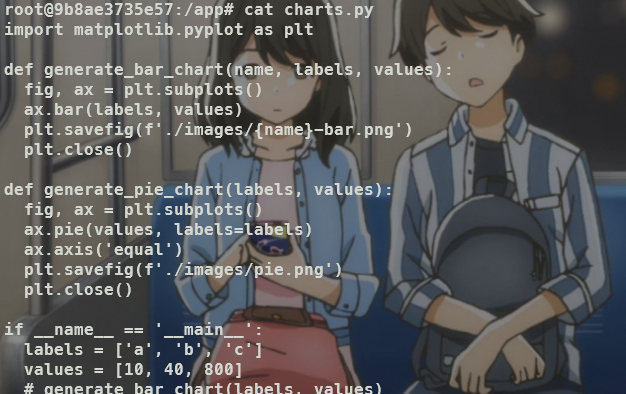

Digamos que quiero cambiar algo en el código y procedemos a hacerlo en [charts.py](py-project/app/charts.py)

**Código actual**

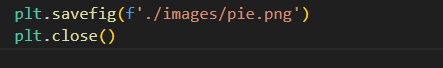

**Cambio nuevo**

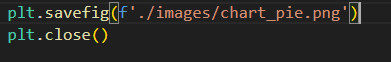


Si vamos al contenedor para ver si se hizo un cambio, procedemos a inspeccionar `cat charts.py`.

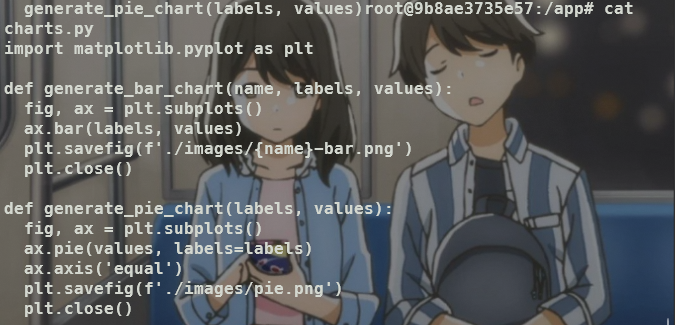

Como se puede ver aún no tenemos el cambio y la razón es porque el sistema de archivos con el que trabaja el contenedor no esta enlazado. 

**Si queremos que se vea reflejado el cambio, necesitamos salir del contenedor y volver a hacer una construcción del contenedor**

```bash
#salir del contendor
exit
#bajar contenedor
docker-compose down
#volver a construir el contenedor
docker-compose build
#subir contenedor
docker-compose up -d
#ejecutarlo
docker-compose exec app-csv bash
```

Esto no es agradable y daña la experiencia de desarrollo, porque cada que exista un cambio se tiene que realizar todo el mismo proceso una y otra vez.

Entonces lo siguiente es ver como enlazar **ambos sistemas de archivos para que exista una actualización automática**

## Enlazando sistema de archivos
Para conectar el sistema de archivos de la máquina local con el sistema de archivos del contenedor, modificaremos el archivo [docker-compose.yml](py-project/app/docker-compose.yml).

**Cambio hecho**

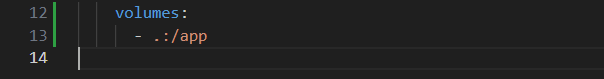

Ahora tenemos que actualizar con el siguiente comando
```bash
#Salir de docker
exit
#Recreando
docker-compose up -d
```
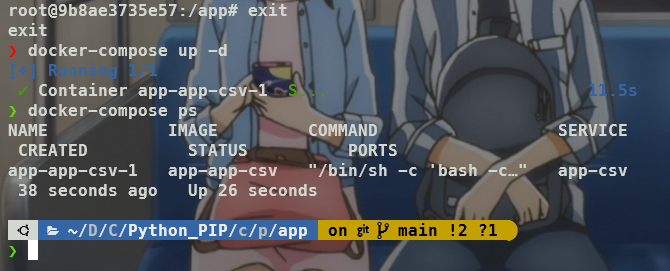

Volver a ponerlo en marchar y entrar
```bash
#Entrar en el contenedor
docker-compose exec app-csv bash
#ver los cambios generados en el archivo
cat charts.py
```
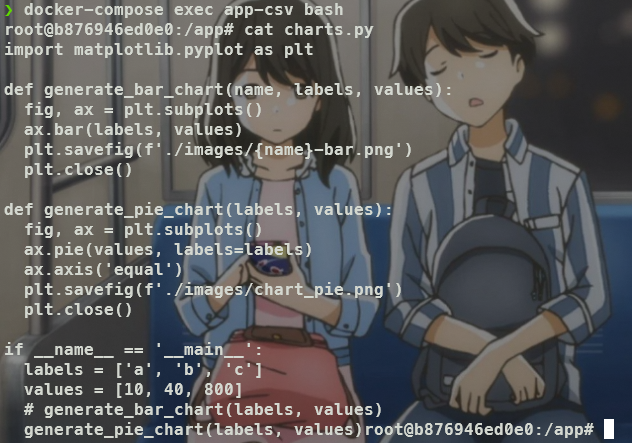

Ahora hagamos un cambio en tiempo real.

**Estado actual**

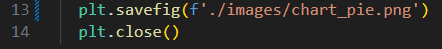

**Cambio**

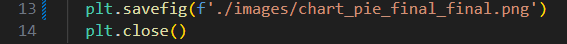

**Ahora para ver los cambios solo necesitamos hacer**

```bash
#entrar al archivo modificado
cat charts.py
```
**Listo ya se ha modificado de manera automática y rápido**

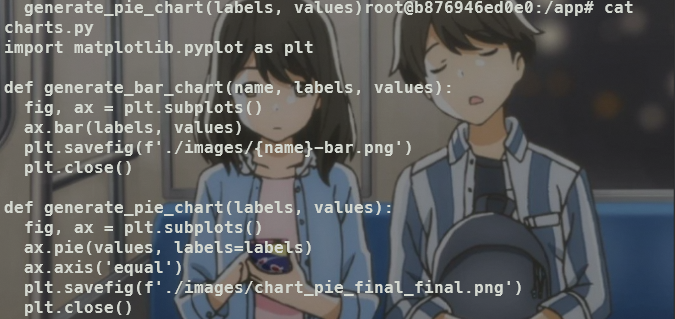

Esto quiere decir que puedo realizar cambios sin estar entrando, construyendo y saliendo del contenedor.

### Resumen

Ahora estamos corriendo la aplicación dentro de un contenedor bastante profesional y ademas podríamos subirlo a cualquier nube.

Lo mas común es utilizar Docker para **servidores** o cosas que van a correr continuamente en la nube.

Ahora vamos a Dockerizar el **web server** que hemos creado con Fast API en la siguiente clase.